<a href="https://colab.research.google.com/github/chinmay002/NLP/blob/main/hugging_face_text_classification_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements(is_chapter2=True)

Cloning into 'notebooks'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 526 (delta 143), reused 135 (delta 126), pack-reused 353
Receiving objects: 100% (526/526), 28.62 MiB | 16.07 MiB/s, done.
Resolving deltas: 100% (250/250), done.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [2]:
from utils import *
setup_chapter()

Using transformers v4.16.2
Using datasets v1.16.1


In [3]:
from datasets import list_datasets

all_datasets = list_datasets()


In [4]:
len(all_datasets)

69072

In [12]:
all_datasets[:10]

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews']

In [6]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

Downloading:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.28k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/592k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/74.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/74.9k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = dataset['train']
test_ds = dataset['test']

In [8]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}

In [10]:
train_ds[:10]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}

In [11]:
import pandas as pd
import numpy as np


In [12]:
train_df = pd.DataFrame(train_ds)
test_df = pd.DataFrame(test_ds)

In [13]:
train_df['label'] = train_df['label'].astype('str')
test_df['label'] = test_df['label'].astype('str')

In [14]:
cat_dic = {'0':'sadness','1' :'joy', '2':'love','3': 'anger','4': 'fear', '5':'surprise'}
train_df['label_name'] = train_df['label'].map(cat_dic)
test_df['label_name'] = test_df['label'].map(cat_dic)

<Axes: >

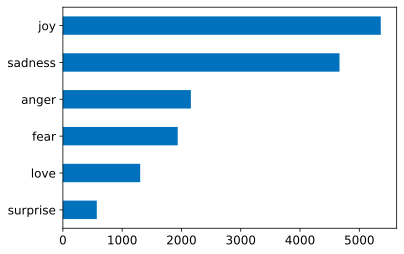

In [15]:
train_df['label_name'].value_counts(ascending = True).plot.barh()

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

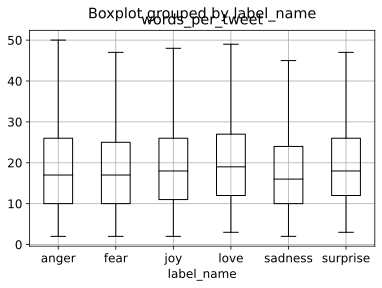

In [16]:
#How long are your tweets
train_df['words_per_tweet'] = train_df['text'].str.split(' ').apply(len)
train_df.boxplot('words_per_tweet',by = 'label_name',showfliers= False,color= 'black')

##Tokenization

In [17]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

token2index ={ch:ind  for ind,ch in enumerate(sorted(set(tokenized_text)))}
print(token2index)
index2token ={ind:ch  for ind,ch in enumerate(sorted(set(tokenized_text)))}
print(index2token)



['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']
{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}
{0: ' ', 1: '.', 2: 'L', 3: 'N', 4: 'P', 5: 'T', 6: 'a', 7: 'c', 8: 'e', 9: 'f',
10: 'g', 11: 'i', 12: 'k', 13: 'n', 14: 'o', 15: 'r', 16: 's', 17: 't', 18: 'x',
19: 'z'}


In [18]:
input_ids = [token2index[token] for token in tokenized_text]
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [19]:
import torch
import torch.nn.functional as F

one_hot_encodings = F.one_hot(torch.tensor(input_ids),num_classes=len(token2index))
one_hot_encodings.shape

torch.Size([38, 20])

In [64]:
one_hot_encodings

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,

In [20]:

from huggingface_hub import notebook_login
notebook_login()

In [21]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [22]:
encoded_text = tokenizer(text)
print(encoded_text)

tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


In [23]:
def tokenize(batch):
  return tokenizer(batch['text'],padding = True,truncation = True)

In [24]:
dataset['train'][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [25]:
tokenize(dataset['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [26]:
emotions_encode = dataset.map(tokenize,batched=True,batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [27]:
emotions_encode['train'].features

{'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

##PretrainedModel

In [28]:
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

In [30]:
text = 'This is going to be fun'
inputs = tokenizer(text,return_tensors='pt') #return pytorch tensors
inputs.input_ids.shape  #1 +6 + 1  [batch_size,n_toksn]
print(inputs.items())

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 2183, 2000, 2022, 4569,
102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1, 1, 1]]))])


In [41]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 2183, 2000, 2022, 4569,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [42]:
#ww have model on gpu , our inputs wshoul also be on gpu.
inputs = {k:v.to(device) for k,v in inputs.items()}
print(inputs)
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

{'input_ids': tensor([[ 101, 2023, 2003, 2183, 2000, 2022, 4569,  102]],
device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]],
device='cuda:0')}
BaseModelOutput(last_hidden_state=tensor([[[-0.0255, -0.1019,  0.2463,  ...,
-0.0818,  0.1839,  0.3113],
         [-0.2961, -0.3707,  0.0072,  ..., -0.5803,  0.1007,  0.1365],
         [-0.2444, -0.3587,  0.5119,  ..., -0.3116,  0.0277,  0.4984],
         ...,
         [ 0.0700, -0.2564,  0.5126,  ..., -0.3602, -0.2737,  0.3652],
         [-0.1696, -0.3316,  0.3002,  ...,  0.0565, -0.2059, -0.0063],
         [ 0.8453,  0.1862, -0.1578,  ...,  0.0930, -0.4903, -0.3531]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [101]:
outputs.last_hidden_state.shape #batch,token,emb

torch.Size([1, 8, 768])

In [105]:
outputs.last_hidden_state[:,0].shape  #shape of cls token

torch.Size([1, 768])

In [43]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  print(inputs)
  with torch.no_grad():
      last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [44]:
#map requires function to retunr python or numpy objects but model takes tensors as input.
emotions_encode.set_format('torch',columns = ['input_ids','attention_mask','label'])




In [47]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [48]:
emotions_hidden = emotions_encode.map(extract_hidden_states,batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'input_ids': tensor([[
101,  1045,  2134,  ...,     0,     0,     0],
        [  101,  1045,  2064,  ...,     0,     0,     0],
        [  101, 10047,  9775,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2131,  ...,     0,     0,     0],
        [  101,  1045,  2572,  ...,     0,     0,     0],
        [  101,  1045,  2318,  ...,     0,     0,     0]], device='cuda:0')}
{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'input_ids': tensor([[ 101,
1045, 2342,  ...,    0,    0,    0],
        [ 101, 1045, 5225,  ..., 

  0%|          | 0/2 [00:00<?, ?ba/s]

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'input_ids': tensor([[
101, 10047,  3110,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2113,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0]], device='cuda:0')}
{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'input_ids': tensor([[ 101,
1045, 2514,  ...,    0,    0,    0],
        [ 101, 1045, 2514,  ..., 

  0%|          | 0/2 [00:00<?, ?ba/s]

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'input_ids': tensor([[
101, 10047,  3110,  ...,     0,     0,     0],
        [  101, 10047,  2039,  ...,     0,     0,     0],
        [  101,  1045,  2196,  ...,     0,     0,     0],
        ...,
        [  101,  1045, 16883,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2572,  ...,     0,     0,     0]], device='cuda:0')}
{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'input_ids': tensor([[
101,  1045,  3473,  ...,     0,     0,     0],
        [  101,  1045,  2514

In [53]:
emotions_hidden['train'].features

{'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'hidden_state': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In [67]:
x_train = np.array(emotions_hidden['train']['hidden_state'])
x_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
x_train.shape,y_train.shape

((16000, 768), (16000,))

##Visualizing Weights

In [57]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(x_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.609819,6.414741,0
1,-2.807124,5.979888,0
2,5.512043,2.974135,3
3,-2.002539,3.928075,2
4,-3.220945,3.976411,3


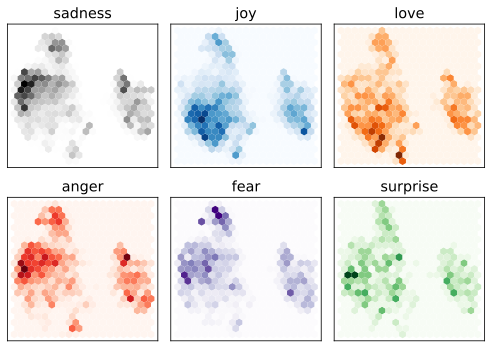

In [66]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,3,figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = dataset["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
  gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_valid,y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6075

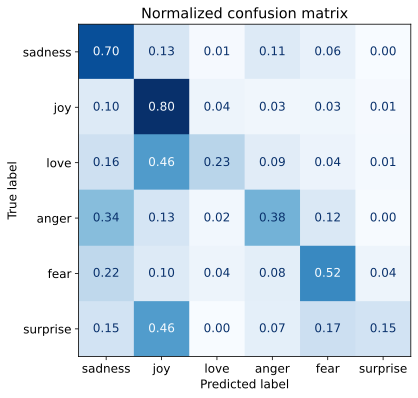

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
y_preds = lr_clf.predict(x_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

##Fine Tuning

In [76]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels = num_labels).to(device)

In [77]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [78]:
from transformers import Trainer, TrainingArguments

In [82]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [81]:
batch_size= 64
log_steps = len(emotions_encode['train'])//batch_size
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir= model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  weight_decay = 0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm = False,
                                  log_level = 'error')

In [84]:
trainer = Trainer(model = model,args =training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = emotions_encode['train'],
                  eval_dataset = emotions_encode['validation'],
                  tokenizer = tokenizer)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.255900,0.218691,0.931000,0.931284
2,0.167000,0.184578,0.940500,0.940224


TrainOutput(global_step=4000, training_loss=0.2903615970611572, metrics={'train_runtime': 365.204, 'train_samples_per_second': 87.622, 'train_steps_per_second': 10.953, 'total_flos': 720342861696000.0, 'train_loss': 0.2903615970611572, 'epoch': 2.0})

In [85]:
preds_output = trainer.predict(emotions_encode['validation'])

In [87]:
preds_output

PredictionOutput(predictions=array([[ 6.791395 , -2.3660827, -2.5083866, -2.1644907, -2.3132765,
        -2.850299 ],
       [ 6.8058453, -2.122548 , -3.1654196, -1.8176845, -2.133635 ,
        -2.7819278],
       [-2.1573884,  3.091779 ,  4.58555  , -2.392638 , -3.3095255,
        -2.9464998],
       ...,
       [-2.0914834,  7.3290477, -1.1462432, -2.114288 , -2.5639563,
        -2.502874 ],
       [-2.5701766,  3.984254 ,  3.950131 , -2.151775 , -3.3208907,
        -2.9372125],
       [-2.175947 ,  7.318406 , -1.6839223, -2.307263 , -2.2749026,
        -2.0470319]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.18457823991775513, 'test_accuracy': 0.9405, 'test_f1': 0.9402235597073866, 'test_runtime': 7.8243, 'test_samples_per_second': 255.613, 'test_steps_per_second': 31.952})

In [88]:
preds_output.metrics

{'test_loss': 0.18457823991775513,
 'test_accuracy': 0.9405,
 'test_f1': 0.9402235597073866,
 'test_runtime': 7.8243,
 'test_samples_per_second': 255.613,
 'test_steps_per_second': 31.952}

In [89]:
np.argmax(preds_output.predictions,axis=1)

array([0, 0, 2, ..., 1, 1, 1])

##Error Analysis

In [92]:
from torch.nn.functional import cross_entropy

In [105]:
text = 'this is it'
input = tokenizer(text,return_tensors='pt')
input = {k:v.to(device) for k, v in input.items()}
output = model(**input)
torch.argmax(output.logits,axis=1)

tensor([3], device='cuda:0')

In [107]:
def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    outputs = model(**inputs)
    pred_label = torch.argmax(outputs.logits,axis=1)
    loss = cross_entropy(outputs.logits,batch['label'].to(device),reduction='none')
  return{'loss':loss.cpu().numpy(),'predicted_label':pred_label.cpu().numpy()}


In [108]:
emotions_encode.set_format('torch',columns = ['input_ids','attention_mask','label'])

emotions_encode['validation'] = emotions_encode['validation'].map(forward_pass_with_label,batched = True,batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [114]:
emotions_encode.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encode["validation"][:][cols]
df_test[['label','predicted_label']] = df_test[['label','predicted_label']].astype()
df_test.head()

TypeError: ignored